Build the linear regression model using scikit learn in boston data to predict  'Price' based on other dependent variable. 
Here is the code to load the data: 


In [26]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats 
import matplotlib.pyplot as plt 
import sklearn 
from sklearn.datasets import load_boston 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
boston = load_boston() 
bos = pd.DataFrame(boston.data,columns=boston.feature_names) 


In [29]:
bos['Target']=boston.target

In [30]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [31]:
bos.shape

(506, 14)

In [4]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
bos.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
bos.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

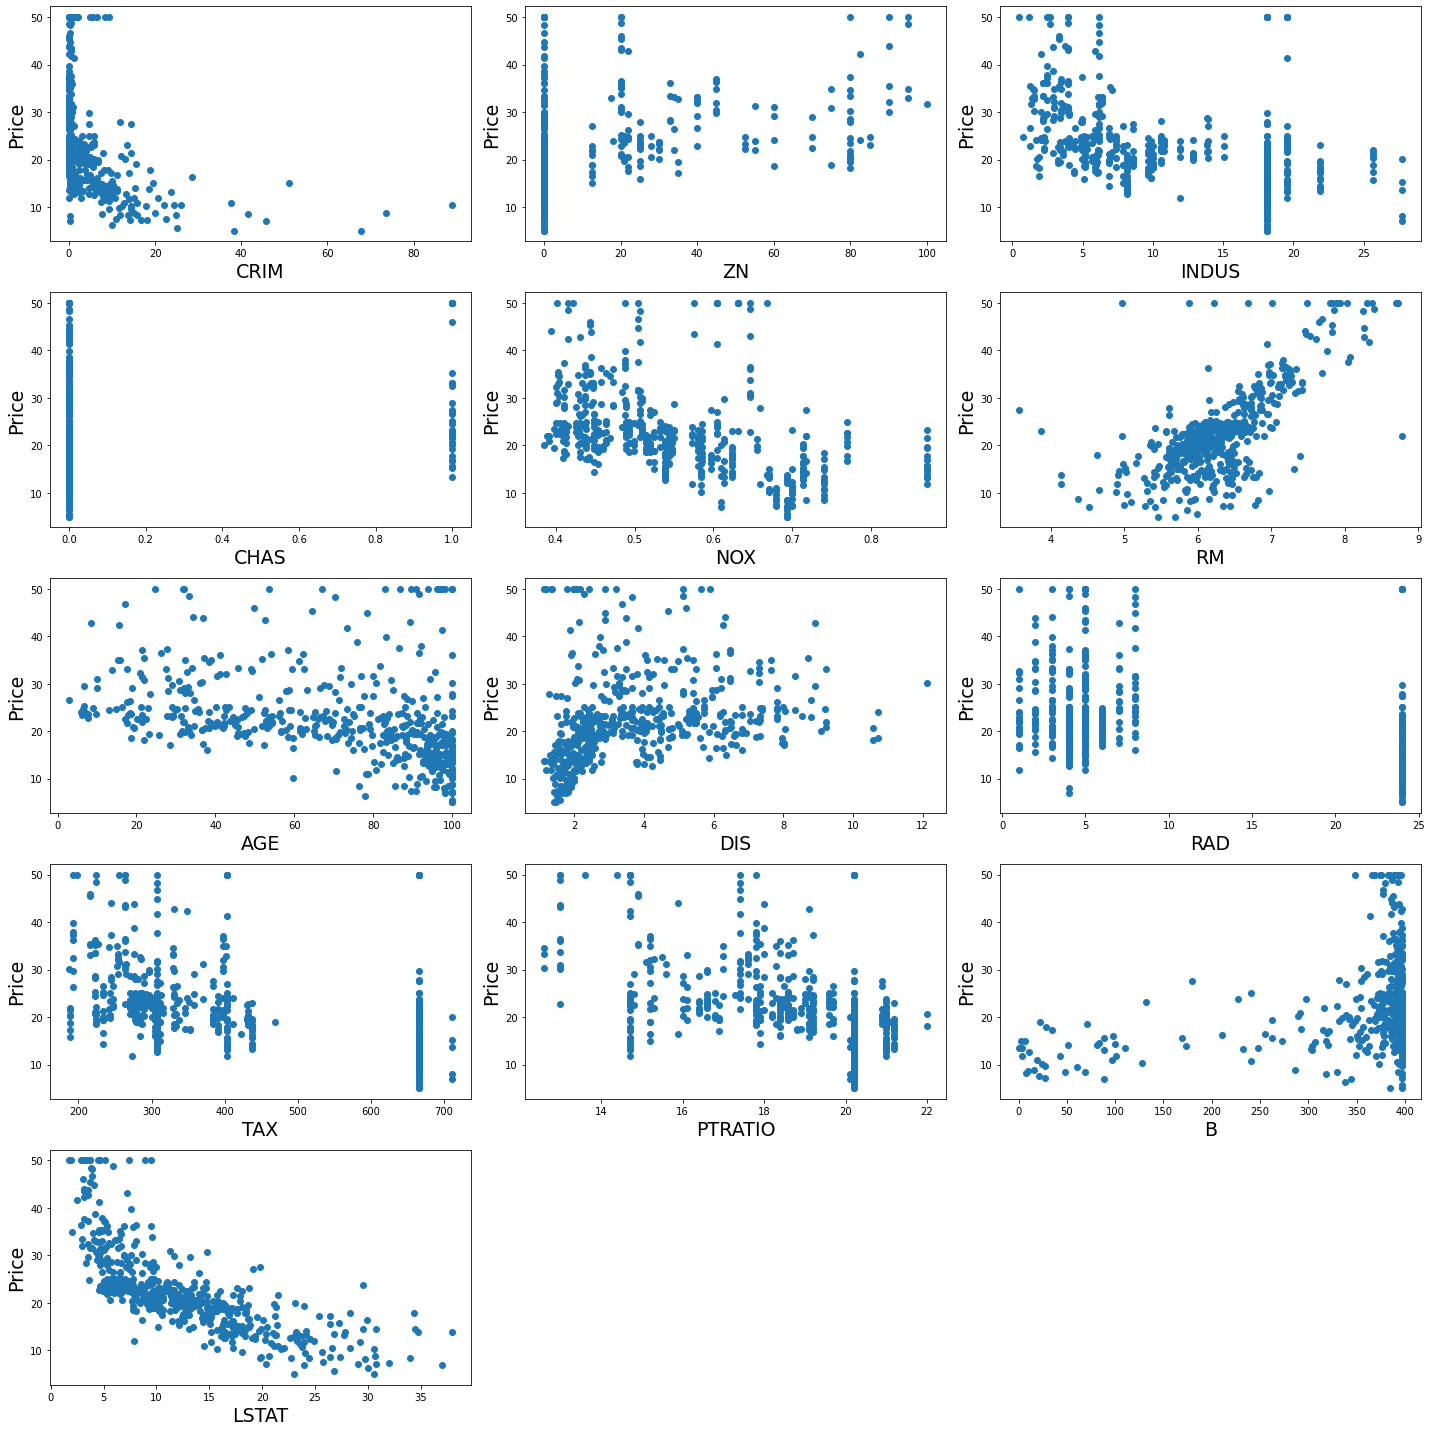

In [50]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for col in X:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(X[col],y)
        plt.xlabel(col,fontsize=19)
        plt.ylabel('Price',fontsize=19)
    plotnumber+=1
plt.tight_layout()

In [125]:
bos.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [56]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=X_scaled
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif['feature']=X.columns

In [117]:
vif

,VIF,feature
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [129]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Target ~ CRIM+NOX+CHAS+DIS+RM+PTRATIO+RAD+B+LSTAT+ZN', data=bos).fit()
# lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.7
Date:                Thu, 24 Dec 2020   Prob (F-statistic):          1.84e-135
Time:                        12:22:18   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3079.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.7123      5.103      6.803      0.000      24.687      44.738
CRIM          -0.1048      0.033     -3.164      0.002      -0.170      -0.040
NOX          -20.3144      3.472     -5.850      0.000     -27.137     -13.492
CHAS           2.9679      0.861      3.448      0.001       1.277       4.659
DIS           -1.4294      0.187     -7.647      0.000      -1.797      -1.062
RM             3.9771      0.408      9.754      0.000       3.176       4.778
PTRATIO       -1.0149      0.129     -7.867      0.000      -1.268      -0.761
RAD            0.1288      0.041      3.157      0.002       0.049       0.209
B              0.0097      0.003      3.591      0.000       0.004       0.015
LSTAT         -0.5281      0.048    -11.019      0.000      -0.622      -0.434
ZN             0.0366      0.013      2.731      0.007       0.010       0.063
==============================================================================
Omnibus:                      166.907   Durbin-Watson:                   1.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              684.418
Skew:                           1.441   Prob(JB):                    2.40e-149
Kurtosis:                       7.915   Cond. No.                     9.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
features=['CRIM','ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
X=bos[features]
y=bos['Target']
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

lm=LinearRegression()
lm.fit(x_train,y_train)


LinearRegression()

,CRIM,CHAS,NOX,RM,DIS,RAD,ZN,PTRATIO,B,LSTAT
0,0.00632,0.0,0.538,6.575,4.0900,1.0,18.0,15.3,396.90,4.98
1,0.02731,0.0,0.469,6.421,4.9671,2.0,0.0,17.8,396.90,9.14
2,0.02729,0.0,0.469,7.185,4.9671,2.0,0.0,17.8,392.83,4.03
3,0.03237,0.0,0.458,6.998,6.0622,3.0,0.0,18.7,394.63,2.94
4,0.06905,0.0,0.458,7.147,6.0622,3.0,0.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0.573,6.593,2.4786,1.0,0.0,21.0,391.99,9.67
502,0.04527,0.0,0.573,6.120,2.2875,1.0,0.0,21.0,396.90,9.08
503,0.06076,0.0,0.573,6.976,2.1675,1.0,0.0,21.0,396.90,5.64
504,0.10959,0.0,0.573,6.794,2.3889,1.0,0.0,21.0,393.45,6.48


In [134]:
lm.score(x_train,y_train)

0.7238662761868391

In [119]:
lm.score(x_test,y_test)

0.7506475160905861

In [120]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [121]:
alpha = lasscv.alpha_
alpha

0.0005514692686475589

In [122]:
lasso=Lasso(alpha)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0005514692686475589)

In [124]:
lasso.score(x_test, y_test)

0.7506276060360874

In [137]:
lm.predict(scaler.transform([[0.1,1,1.0,0.5,2.12,3.0,300,20,398,7.3]]))

array([43.41202699])